In [3]:
import pandas as pd

teledata_location = 'H:\\OneDrive - Instituto Tecnologico y de Estudios Superiores de Monterrey\\MachineLearning_Extern\\ClassContent\\Reto\\Matrices de Viaje para Santiago Chile\\DataSet\\'

df = pd.read_csv(teledata_location + '20210101_RM.csv')  

In [3]:
df.head()

,PHONE_ID,timestamp,bts_id,lat,lon
0,668f7c17a62c937a75f762c7198a7fc98ed4e0e0c64ce0...,2021-01-01T17:22:55.000-03:00,CEMG1,-33.3913,-70.6222
1,780fc36e9a2bc99de12adb740e5e82b3cabba75c1ecd23...,2021-01-01T17:10:19.000-03:00,CEMG1,-33.3913,-70.6222
2,b3c52936d4f8494dae9d1158ce76951e62413d511f5fe2...,2021-01-01T00:35:04.000-03:00,CEMG1,-33.3913,-70.6222
3,a4ab622fe4c0de513c389ab475cee4ad5b5d27e07e32d9...,2021-01-01T17:22:38.000-03:00,CEMG1,-33.3913,-70.6222
4,77d8edaa34e7ac318ef33541957e9f33826dff24217636...,2021-01-01T17:11:12.000-03:00,CEMG1,-33.3913,-70.6222


In [6]:
df['bts_id'].unique().size

1871

In [9]:
list_bts_id = df['bts_id'].unique()
list_phone_id = df['PHONE_ID'].unique()

In [10]:
df_groupby_bts = df.groupby(['bts_id', 'lat', 'lon']).size().reset_index(name='counts_per_bts')

In [40]:
df_groupby_bts[df_groupby_bts['bts_id'] == 'STDB1']['lat'].values[0]
df_groupby_bts[df_groupby_bts['bts_id'] == 'STDB1']['lon'].values[0]

-70.6522

In [23]:
df.isna().sum()

PHONE_ID     0
timestamp    0
bts_id       0
lat          0
lon          0
dtype: int64

In [44]:
len(list_bts_id)

1871

In [41]:
df_groupby_bts

bts_lat_list = []
bts_lon_list = []
count = 0
for bts in list_bts_id:
    count += 1
    #print(count)
    #bts_df = df[df['bts_id'] == bts]
    #if(bts_df['lat'].count() > 0):
    #print('size')
    #print(bts_df['lat'].count())
    #lat = (bts_df['lat'].tolist())[0]
    #lon = (bts_df['lon'].tolist())[0]
    lat = df_groupby_bts[df_groupby_bts['bts_id'] == bts]['lat'].values[0]
    lon = df_groupby_bts[df_groupby_bts['bts_id'] == bts]['lon'].values[0]
    bts_lat_list.append(lat)
    bts_lon_list.append(lon)
    #print(df[df['bts_id'] == bts]['lat'][0])
    #print(df[df['bts_id'] == bts]['lon'][0])
    #break


In [43]:
len(bts_lat_list)

1871

In [45]:
dict_bts = {'bts_id':list_bts_id.tolist(), 'lat':bts_lat_list ,'lon':bts_lon_list}
df_bts = pd.DataFrame(dict_bts)

In [46]:
df_bts.head()

,bts_id,lat,lon
0,CEMG1,-33.3913,-70.6222
1,AMCLF,-33.5208,-70.5438
2,ANGG1,-33.9131,-70.7181
3,ANPUF,-33.5752,-70.6610
4,ATYAF,-33.4124,-70.5219


In [48]:
df_bts.to_csv('bts_data.csv')

In [54]:
df_bts_comuna = df_bts.copy()
df_bts_comuna['comuna'] = pd.NA
df_bts_comuna['comuna'].isna().sum()

1871

In [50]:
import geopandas as gpd
map_loc = 'H:\\OneDrive - Instituto Tecnologico y de Estudios Superiores de Monterrey\\MachineLearning_Extern\\ClassContent\\Reto\\Actividades\\R13\\'
gdf = gpd.read_file(map_loc + "COMUNA_C17.shp")

In [52]:
from shapely.geometry import Point, Polygon

In [72]:
for count_comuna in range(gdf['NOM_COMUNA'].count()):
    #print(comuna)
    comuna = gdf['NOM_COMUNA'][count_comuna]
    for count in range(df_bts_comuna['bts_id'].count()):
        lon = df_bts_comuna['lon'][count]
        lat = df_bts_comuna['lat'][count]

        #print(lon)
        bts_loc = Point(lon, lat)
        geo = gdf['geometry'][count_comuna]
        if(geo.contains(bts_loc)):
            df_bts_comuna['comuna'][count] = comuna

c:\Python\Python37\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == "":


In [74]:
df_bts_comuna.isna().sum()

bts_id    0
lat       0
lon       0
comuna    0
dtype: int64

In [ ]:
df_bts_comuna.to_csv('bts_comuna.csv')

In [59]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   REGION      52 non-null     object  
 1   NOM_REGION  52 non-null     object  
 2   PROVINCIA   52 non-null     object  
 3   NOM_PROVIN  52 non-null     object  
 4   COMUNA      52 non-null     object  
 5   NOM_COMUNA  52 non-null     object  
 6   SHAPE_Leng  52 non-null     float64 
 7   SHAPE_Area  52 non-null     float64 
 8   geometry    52 non-null     geometry
dtypes: float64(2), geometry(1), object(6)
memory usage: 3.8+ KB


In [61]:
gdf['geometry']

0     POLYGON ((-70.61889 -33.73808, -70.61811 -33.7...
1     POLYGON ((-70.63192 -33.64634, -70.63207 -33.6...
2     POLYGON ((-70.78914 -33.36153, -70.78824 -33.3...
3     POLYGON ((-70.71927 -33.41334, -70.71888 -33.4...
4     POLYGON ((-70.59630 -32.95138, -70.59673 -32.9...
5     POLYGON ((-70.73267 -32.92442, -70.73106 -32.9...
6     POLYGON ((-70.79418 -33.17180, -70.79314 -33.1...
7     POLYGON ((-70.66312 -33.32923, -70.66276 -33.3...
8     POLYGON ((-70.69041 -33.36579, -70.69028 -33.3...
9     POLYGON ((-71.26481 -33.41052, -71.26436 -33.4...
10    POLYGON ((-70.99792 -33.19920, -70.99810 -33.2...
11    POLYGON ((-70.63212 -33.55817, -70.63204 -33.5...
12    POLYGON ((-70.65469 -33.54858, -70.65469 -33.5...
13    POLYGON ((-70.67958 -33.44384, -70.67958 -33.4...
14    POLYGON ((-70.65563 -33.47835, -70.65571 -33.4...
15    POLYGON ((-70.62020 -33.39746, -70.62017 -33.3...
16    POLYGON ((-70.66093 -33.39982, -70.66092 -33.3...
17    POLYGON ((-70.88732 -33.70054, -70.88707 -

In [7]:
df['PHONE_ID'].unique().size

1353435

In [8]:
df['timestamp'].max()

'2021-01-01T23:59:59.000-03:00'

In [4]:
df_phone_appear = df.groupby(['PHONE_ID']).size().reset_index(name='counts')
df_phone_appear

,PHONE_ID,counts
0,00000000e3fc09803d408609f55cbf905120d3a41db564...,92
1,0000100159b099202b52b3ee8ee7130f2c5f283591f611...,54
2,00001cca3bf53b8226459edf445ca46ffae00c53d39d82...,70
3,000023f38ae28f3bf87393e0cea45bd598018e7782b3fe...,40
4,000024f02222fc76dfad8db70b19a6094177807362a862...,53
...,...,...
1353430,ffffa11de56df5b3ac085b7a84e90af1553d6cc604f43b...,16
1353431,ffffa17bcc4a44837795dbee241e641b0bf6e0f0f45408...,13
1353432,ffffd2e21a16bc902e5e242aef7d68cbbb824a82b7efa8...,48
1353433,ffffdecede452ab62eeeff9cfc2a57c8a8c0396c671a06...,34


array([[<AxesSubplot:title={'center':'counts'}>]], dtype=object)

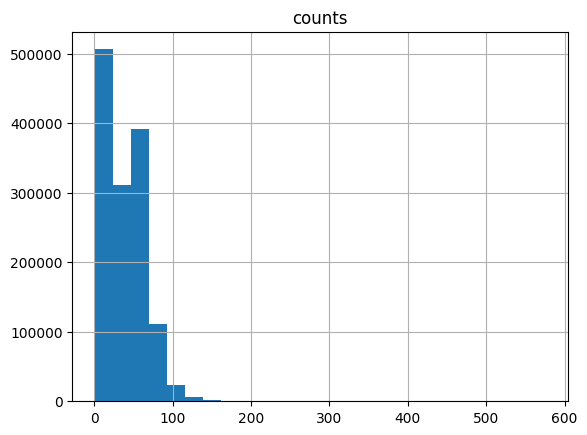

In [6]:
df_phone_appear.hist(column='counts', bins=25)

In [7]:
df_phone_appear['counts'].describe()

count    1.353435e+06
mean     3.666089e+01
std      2.784613e+01
min      1.000000e+00
25%      1.100000e+01
50%      3.700000e+01
75%      5.400000e+01
max      5.760000e+02
Name: counts, dtype: float64

In [9]:
df['timestamp'].min()

'2021-01-01T00:00:00.000-03:00'

In [4]:
df.describe()

,lat,lon
count,4.961813e+07,4.961813e+07
mean,-3.349199e+01,-7.068545e+01
std,1.219281e-01,1.482997e-01
min,-3.402680e+01,-7.148880e+01
25%,-3.356200e+01,-7.073630e+01
50%,-3.346940e+01,-7.066010e+01
75%,-3.341880e+01,-7.058930e+01
max,-3.292550e+01,-7.005880e+01


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49618132 entries, 0 to 49618131
Data columns (total 5 columns):
 #   Column     Dtype  
---  ------     -----  
 0   PHONE_ID   object 
 1   timestamp  object 
 2   bts_id     object 
 3   lat        float64
 4   lon        float64
dtypes: float64(2), object(3)
memory usage: 1.8+ GB
